# IDS using Machine Learning

## Importing all the libraries

In [ ]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
pd.set_option("display.max_columns",None)
pd.set_option("display.max_rows",None)
%matplotlib inline

## Importing all the dataset

In [ ]:

df1 = pd.read_csv("//content//2020.07.08.csv")
df2 = pd.read_csv("//content//2021.01.01.csv")
df3 = pd.read_csv("//content//2021.02.12.csv")
df4 = pd.read_csv("//content//2022.06.12.csv")

## Merging all the dataset

In [ ]:
dataset = pd.concat([df1,df2,df3,df4])

## Exploring the dataset

In [ ]:
dataset.columns

Index(['avg_ipt', 'bytes_in', 'bytes_out', 'dest_ip', 'dest_port', 'entropy',
       'num_pkts_out', 'num_pkts_in', 'proto', 'src_ip', 'src_port',
       'time_end', 'time_start', 'total_entropy', 'label', 'duration'],
      dtype='object')

In [ ]:
dataset.head()

,avg_ipt,bytes_in,bytes_out,dest_ip,dest_port,entropy,num_pkts_out,num_pkts_in,proto,src_ip,src_port,time_end,time_start,total_entropy,label,duration
0,52.50,270,191,786,445.0,4.588516,6,6,6,47331,56965.0,1594168229367522,1594168228968772,2115.305700,malicious,0.398750
1,50.25,270,191,786,445.0,4.588516,6,6,6,47331,57217.0,1594168231492958,1594168231104076,2115.305700,malicious,0.388882
2,50.00,270,191,786,445.0,4.588516,6,6,6,47331,57294.0,1594168232099461,1594168231710708,2115.305700,malicious,0.388753
3,0.00,56,56,786,NaN,1.020244,1,1,1,55960,NaN,1594168231421839,159416823142178,114.267365,outlier,0.000059
4,53.75,270,191,786,445.0,4.588516,6,6,6,47331,57325.0,1594168232419566,1594168232008625,2115.305700,malicious,0.410941


In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1055067 entries, 0 to 26166
Data columns (total 16 columns):
 #   Column         Non-Null Count    Dtype  
---  ------         --------------    -----  
 0   avg_ipt        1055067 non-null  float64
 1   bytes_in       1055067 non-null  int64  
 2   bytes_out      1055067 non-null  int64  
 3   dest_ip        1055067 non-null  int64  
 4   dest_port      1032471 non-null  float64
 5   entropy        1055067 non-null  float64
 6   num_pkts_out   1055067 non-null  int64  
 7   num_pkts_in    1055067 non-null  int64  
 8   proto          1055067 non-null  int64  
 9   src_ip         1055067 non-null  int64  
 10  src_port       1032471 non-null  float64
 11  time_end       1055067 non-null  int64  
 12  time_start     1055067 non-null  int64  
 13  total_entropy  1055067 non-null  float64
 14  label          1055067 non-null  object 
 15  duration       1055067 non-null  float64
dtypes: float64(6), int64(9), object(1)
memory usage: 136.8+ 

In [ ]:
dataset.isna().sum()

avg_ipt              0
bytes_in             0
bytes_out            0
dest_ip              0
dest_port        22596
entropy              0
num_pkts_out         0
num_pkts_in          0
proto                0
src_ip               0
src_port         22596
time_end             0
time_start           0
total_entropy        0
label                0
duration             0
dtype: int64

In [ ]:
dataset.shape

(1055067, 16)

In [ ]:
dataset.duplicated().sum()

7118

In [ ]:
dataset['label'].value_counts()

benign       581575
malicious    286114
outlier      187378
Name: label, dtype: int64

In [ ]:
dataset['proto'].value_counts()

6     1013136
1       22562
17      19335
58         23
47          9
2           2
Name: proto, dtype: int64

## Cleaning the data

In [ ]:
dataset = dataset.drop(['time_start', 'time_end'], axis=1)

In [ ]:
dataset.dropna(inplace=True)

In [ ]:
dataset.drop_duplicates(inplace = True)

In [ ]:
dataset['label'] = dataset['label'].replace('outlier','malicious')

In [ ]:
dataset['label'] = dataset.label.map({'malicious':1, 'benign':0})

In [ ]:
dataset['label'].value_counts()

0    457062
1    423053
Name: label, dtype: int64

In [ ]:
# equal
df5 = dataset[dataset["label"] == 0][:300000]
df6 = dataset[dataset["label"] == 1][:300000]
new = pd.concat([ df5,df6], axis =0)

## Defining X and Y of the dataset

In [ ]:
y = new["label"]
col = ['avg_ipt', 'bytes_in', 'bytes_out', 'dest_ip', 'dest_port', 'entropy','num_pkts_out', 'num_pkts_in', 'proto', 'src_ip', 'src_port', 'total_entropy', 'duration']
x = new[col]

## Spliting the dataset into train and test set

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

In [ ]:
x_train.shape

(480000, 13)

In [ ]:
x_test.shape

(120000, 13)

## Training the models

### Decision Tree classifier

In [ ]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
dtc = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
dtc.fit(x_train, y_train)
dtc_train_accuracy=dtc.score(x_train,y_train)
dtc_test_accuracy=dtc.score(x_test,y_test)
print("Accuracy of train dataset: {:.4f}%".format(dtc_train_accuracy*100))
print("Accuracy of train dataset: {:.4f}%".format(dtc_test_accuracy*100))

Accuracy of train dataset: 99.9979%
Accuracy of train dataset: 99.9817%


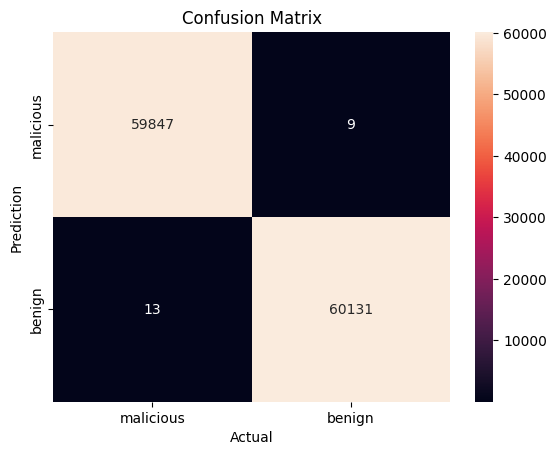

In [ ]:
y_pred = dtc.predict(x_test)
cm = confusion_matrix(y_test,y_pred)
sns.heatmap(cm, annot=True,fmt='g', xticklabels=['malicious', 'benign'], yticklabels=['malicious', 'benign'])
plt.ylabel('Prediction')
plt.xlabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy   :", accuracy)
precision = precision_score(y_test, y_pred)
print("Precision :", precision)
recall = recall_score(y_test, y_pred)
print("Recall    :", recall)
F1_score = f1_score(y_test, y_pred)
print("F1-score  :", F1_score)

Accuracy   : 0.9998166666666667
Precision : 0.9998503491852344
Recall    : 0.9997838520883213
F1-score  : 0.9998170995311096


### Random Forest Classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators = 50)
rfc.fit(x_train, y_train)
rfc_train_accuracy=rfc.score(x_train,y_train)
rfc_test_accuracy=rfc.score(x_test,y_test)
print("Accuracy of train dataset: {:.4f}%".format(rfc_train_accuracy*100))
print("Accuracy of test dataset: {:.4f}%".format(rfc_test_accuracy*100))


Accuracy of train dataset: 99.9977%
Accuracy of test dataset: 99.9875%


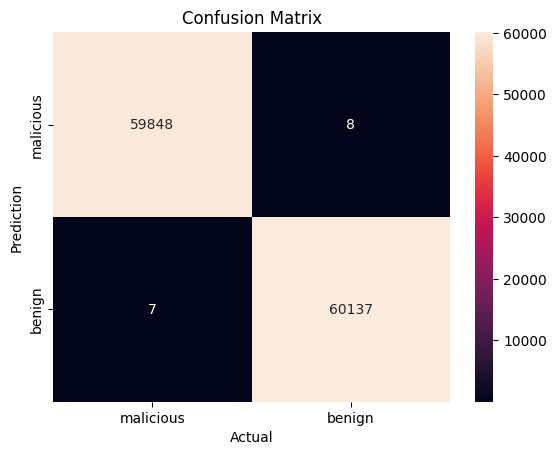

In [ ]:
y_pred = rfc.predict(x_test)
cm = confusion_matrix(y_test,y_pred)
sns.heatmap(cm, annot=True,fmt='g', xticklabels=['malicious', 'benign'], yticklabels=['malicious', 'benign'])
plt.ylabel('Prediction')
plt.xlabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy   :", accuracy)
precision = precision_score(y_test, y_pred)
print("Precision :", precision)
recall = recall_score(y_test, y_pred)
print("Recall    :", recall)
F1_score = f1_score(y_test, y_pred)
print("F1-score  :", F1_score)

Accuracy   : 0.999875
Precision : 0.9998669881120625
Recall    : 0.9998836126629422
F1-score  : 0.9998753003183999


## Finding important features of the dataset

In [ ]:
feature = dict(zip(col,rfc.feature_importances_))
fe = sorted(feature.items(),key = lambda x: x[1], reverse=True)
fe

[('total_entropy', 0.3286275929310018),
 ('dest_port', 0.1823047889759287),
 ('bytes_out', 0.1436363330666342),
 ('duration', 0.08164100074166415),
 ('src_port', 0.06478666500769521),
 ('num_pkts_in', 0.044664829964735704),
 ('num_pkts_out', 0.037198467716777386),
 ('entropy', 0.03278751027544348),
 ('bytes_in', 0.031157577349024607),
 ('dest_ip', 0.02933190475887235),
 ('avg_ipt', 0.016089896392137204),
 ('src_ip', 0.005429973691543181),
 ('proto', 0.0023434591285419948)]

### Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(random_state=0)
lr.fit(x_train, y_train)
lr_train_accuracy=lr.score(x_train,y_train)
lr_test_accuracy=lr.score(x_test,y_test)
print("Accuracy of train dataset: {:.4f}%".format(lr_train_accuracy*100))
print("Accuracy of test dataset: {:.4f}%".format(lr_test_accuracy*100))

Accuracy of train dataset: 92.4669%
Accuracy of test dataset: 92.5517%


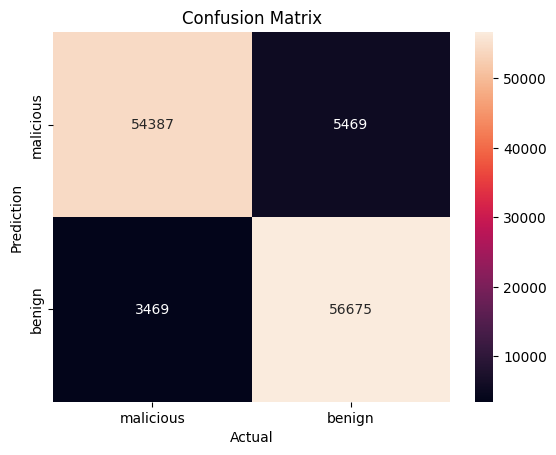

In [ ]:
y_pred = lr.predict(x_test)
cm = confusion_matrix(y_test,y_pred)
sns.heatmap(cm, annot=True,fmt='g', xticklabels=['malicious', 'benign'], yticklabels=['malicious', 'benign'])
plt.ylabel('Prediction')
plt.xlabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy   :", accuracy)
precision = precision_score(y_test, y_pred)
print("Precision :", precision)
recall = recall_score(y_test, y_pred)
print("Recall    :", recall)
F1_score = f1_score(y_test, y_pred)
print("F1-score  :", F1_score)

Accuracy   : 0.9255166666666667
Precision : 0.9119947219361483
Recall    : 0.9423217611066773
F1-score  : 0.926910244668324


### K-Nearest Neighbour

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train, y_train)
knn_train_accuracy=knn.score(x_train,y_train)
knn_test_accuracy=knn.score(x_test,y_test)
print("Accuracy of train dataset: {:.4f}%".format(knn_train_accuracy*100))
print("Accuracy of test dataset: {:.4f}%".format(knn_train_accuracy*100))

Accuracy of train dataset: 99.9483%
Accuracy of test dataset: 99.9483%


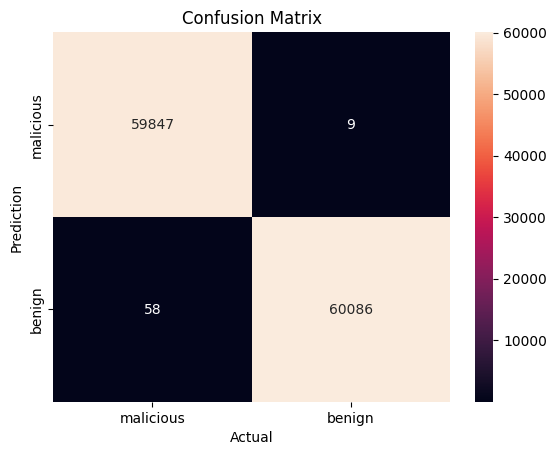

In [ ]:
y_pred = knn.predict(x_test)
cm = confusion_matrix(y_test,y_pred)
sns.heatmap(cm, annot=True,fmt='g', xticklabels=['malicious', 'benign'], yticklabels=['malicious', 'benign'])
plt.ylabel('Prediction')
plt.xlabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy   :", accuracy)
precision = precision_score(y_test, y_pred)
print("Precision :", precision)
recall = recall_score(y_test, y_pred)
print("Recall    :", recall)
F1_score = f1_score(y_test, y_pred)
print("F1-score  :", F1_score)

Accuracy   : 0.9994416666666667
Precision : 0.9998502371245528
Recall    : 0.9990356477786645
F1-score  : 0.9994427764701967


### Ensemblence of DT, RF, KNN

In [ ]:
from sklearn.metrics import log_loss
from sklearn.ensemble import VotingClassifier
final_model = VotingClassifier(
estimators=[('model1', dtc), ('model2', rfc),('model3',knn)], voting='hard')
final_model.fit(x_train, y_train)
pred = final_model.predict(x_test)
accuracy = accuracy_score(y_test,pred)
print("accuracy: {:.4f}%".format(accuracy*100))
F1_score = f1_score(y_test, pred)
print("F1-score  :", F1_score)

accuracy: 99.9850%
F1-score  : 0.9998503566499842


## Applying Deep Learning

### Artificial Neural Network

In [ ]:
import tensorflow as tf

In [ ]:
ann = tf.keras.models.Sequential()

In [ ]:
ann.add(tf.keras.layers.Dense(units=6,activation='relu'))

In [ ]:
ann.add(tf.keras.layers.Dense(units=6,activation='relu'))

In [ ]:
ann.add(tf.keras.layers.Dense(units=6,activation='relu'))

In [ ]:
ann.add(tf.keras.layers.Dense(units=1,activation='sigmoid'))

In [ ]:
ann.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
ann.fit(x_train, y_train, batch_size = 32, epochs = 100)

Epoch 1/100
15000/15000 [==============================] - 27s 2ms/step - loss: 45.4938 - accuracy: 0.9467
Epoch 2/100
15000/15000 [==============================] - 27s 2ms/step - loss: 0.0947 - accuracy: 0.9724
Epoch 3/100
15000/15000 [==============================] - 26s 2ms/step - loss: 0.1022 - accuracy: 0.9729
Epoch 4/100
15000/15000 [==============================] - 26s 2ms/step - loss: 0.7204 - accuracy: 0.9733
Epoch 5/100
15000/15000 [==============================] - 26s 2ms/step - loss: 0.0705 - accuracy: 0.9738
Epoch 6/100
15000/15000 [==============================] - 26s 2ms/step - loss: 8.7437 - accuracy: 0.9735
Epoch 7/100
15000/15000 [==============================] - 26s 2ms/step - loss: 0.0589 - accuracy: 0.9752
Epoch 8/100
15000/15000 [==============================] - 26s 2ms/step - loss: 0.0456 - accuracy: 0.9824
Epoch 9/100
15000/15000 [==============================] - 26s 2ms/step - loss: 0.0439 - accuracy: 0.9825
Epoch 10/100
15000/15000 [===================

In [ ]:
y_pred = ann.predict(x_test)
y_pred = (y_pred > 0.5)

from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
acc=accuracy_score(y_test, y_pred)
print("Accuracy is :", acc*100,"%")

3750/3750 [==============================] - 4s 1ms/step
[[59819    37]
 [  308 59836]]
Accuracy is : 99.7125 %
